In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import ipywidgets as widgets
from IPython.display import display

In [3]:
df = pd.read_csv('/content/car data.csv')
df['Age'] = 2026 - df['Year']
le_car = LabelEncoder()
df['Car_Name_Encoded'] = le_car.fit_transform(df['Car_Name'])
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

X = df_encoded.drop(['Selling_Price', 'Car_Name', 'Year'], axis=1)
y = df_encoded['Selling_Price']
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestRegressor(random_state=42)

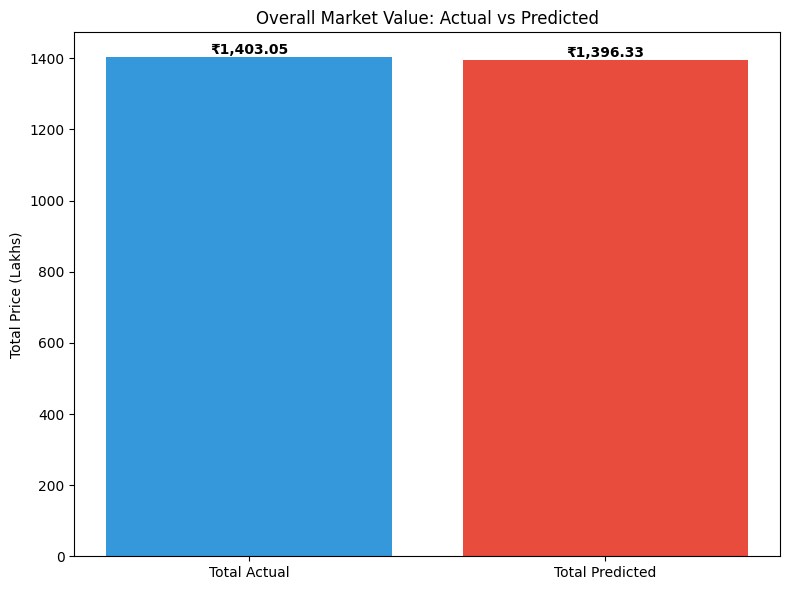

--- Car Price Prediction System ---


In [4]:
def plot_price_comparison(actual, predicted):
    total_actual = np.sum(actual)
    total_predicted = np.sum(predicted)

    plt.figure(figsize=(8, 6))
    bars = plt.bar(['Total Actual', 'Total Predicted'], [total_actual, total_predicted], color=['#3498db', '#e74c3c'])
    plt.ylabel('Total Price (Lakhs)')
    plt.title('Overall Market Value: Actual vs Predicted')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'₹{yval:,.2f}', va='bottom', ha='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

y_pred = model.predict(X)
plot_price_comparison(y, y_pred)

print("--- Car Price Prediction System ---")
car_dropdown = widgets.Dropdown(options=sorted(df['Car_Name'].unique()), description='Car Model:')
year_slider = widgets.IntSlider(min=2000, max=2026, value=2018, description='Year:')
kms_input = widgets.IntText(value=30000, description='Driven Kms:')
predict_btn = widgets.Button(description="Predict Price", button_style='success')
output = widgets.Output()

In [5]:
def on_click(b):
    with output:
        output.clear_output()
        car_idx = le_car.transform([car_dropdown.value])[0]
        age = 2026 - year_slider.value
        avg_present_price = df[df['Car_Name'] == car_dropdown.value]['Present_Price'].mean()

        input_data = pd.DataFrame(columns=X.columns)
        input_data.loc[0] = 0
        input_data.at[0, 'Present_Price'] = avg_present_price
        input_data.at[0, 'Driven_kms'] = kms_input.value
        input_data.at[0, 'Owner'] = 0
        input_data.at[0, 'Age'] = age
        input_data.at[0, 'Car_Name_Encoded'] = car_idx

        if 'Fuel_Type_Petrol' in input_data.columns: input_data.at[0, 'Fuel_Type_Petrol'] = 1
        if 'Transmission_Manual' in input_data.columns: input_data.at[0, 'Transmission_Manual'] = 1

        prediction = model.predict(input_data)[0]
        print(f"Predicted Selling Price for {car_dropdown.value} ({year_slider.value}):")
        print(f"Estimated: ₹ {prediction:.2f} Lakhs")

predict_btn.on_click(on_click)
display(car_dropdown, year_slider, kms_input, predict_btn, output)

Dropdown(description='Car Model:', options=('800', 'Activa 3g', 'Activa 4g', 'Bajaj  ct 100', 'Bajaj Avenger 1…

IntSlider(value=2018, description='Year:', max=2026, min=2000)

IntText(value=30000, description='Driven Kms:')

Button(button_style='success', description='Predict Price', style=ButtonStyle())

Output()